Modelo LSTM para prever o parâmetro pH 
Experimento:01

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler
import math
import matplotlib.pyplot as plt
plt.rcParams['xtick.labelsize']=18
plt.rcParams['ytick.labelsize']=18
plt.rcParams.update({'font.size':18})

In [2]:
str_files = ''

#df = pd.read_csv(str_files + "ph.csv",encoding='utf-8',sep=';')
dateparse = lambda dates:pd.datetime.strptime(dates,'%d/%m/%Y')
df = pd.read_csv(str_files + 'Fosforo.CSV',encoding='utf-8',sep=';', parse_dates = ['data_coleta'],index_col=['data_coleta'],date_parser=dateparse)

In [3]:
#df.head()

In [4]:
z = df.loc[df['UGRHI'] == '10 - SOROCABA/MEDIO TIETE']
#z.info()

In [5]:
z = z.dropna(axis=1,how='any')
#for field in z.columns:
    #print(field,'NaN',z[field].isnull().sum())
#print(len(z))

In [6]:
trainingd = z.resample('3M').mean()
trainingd = trainingd.iloc[:,1:2].values
print(len(trainingd))

166


In [7]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
training_set_scaled = sc.fit_transform(trainingd)
#training_set_scaled

In [8]:
x_train = []
y_train = []
timestamp = 33
length = len(trainingd)
for i in range(timestamp, length):
    x_train.append(training_set_scaled[i-timestamp:i, 0])
    y_train.append(training_set_scaled[i, 0])

x_train = np.array(x_train)
y_train = np.array(y_train)

In [9]:
print (x_train[0])
print ('\n')
print (y_train[0])

[1.02204765e-03 1.91417398e-03 6.95079014e-04 9.93898029e-04
 1.00000000e+00 3.03149726e-05 3.24803277e-04 3.68110381e-05
 0.00000000e+00 1.37066983e-03 6.38779779e-04 7.77795582e-04
 3.59448960e-04 3.07480436e-04 1.03720513e-03 9.63583057e-04
 9.83071253e-04 1.74527628e-03 1.16640466e-03 3.78215372e-04
 1.75772707e-03 4.15098589e-03 4.08602523e-03 9.90000390e-03
 5.18880969e-03 3.53385966e-03 8.73807431e-03 7.95334959e-03
 6.74399872e-03 2.16860322e-03 7.00654803e-03 1.38842574e-02
 8.16771975e-03]


0.0023862214118981935


In [10]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(133, 33, 1)

In [11]:
test_set = df.loc[df['UGRHI'] == '06 - ALTO TIÊTE']
test_set = test_set.dropna(axis=1,how='any')
#for field in test_set.columns:
    #print(field,'NaN',test_set[field].isnull().sum())
    
test_set = test_set.resample('3M').mean()
y_test = test_set.iloc[timestamp:,1:2].values


valor = test_set.iloc[:,1:2].values
valor_scaled = sc.transform(valor)

x_test = []
length = len(test_set)

for i in range(timestamp, length):
    x_test.append(valor_scaled[i-timestamp:i,0])
    
x_test = np.array(x_test)
x_test.shape

x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))
x_test.shape

(135, 33, 1)

In [12]:
test_x = []
test_y = []

length = len(test_set)
for i in range(timestamp, length):
    test_x.append(valor_scaled[i-timestamp:i, 0])
    test_y.append(valor_scaled[i, 0])

test_x = np.array(test_x)
test_y = np.array(test_y)

test_x = np.reshape(test_x, (test_x.shape[0], test_x.shape[1], 1))
test_x.shape

(135, 33, 1)

Rede Neural LSTM com 10 neuronios nas camadas de entrada e oculta - epocas:100
Train on 133 samples, validate on 135 samples
Epoch 1/100
133/133 [==============================] - 18s 135ms/sample - loss: 9.7243e-05 - val_loss: 6.8828e-05
Epoch 2/100
133/133 [==============================] - 1s 6ms/sample - loss: 6.4059e-05 - val_loss: 8.1332e-05
Epoch 3/100
133/133 [==============================] - 1s 7ms/sample - loss: 6.1494e-05 - val_loss: 5.8212e-05
Epoch 4/100
133/133 [==============================] - 1s 6ms/sample - loss: 5.2100e-05 - val_loss: 5.4095e-05
Epoch 5/100
133/133 [==============================] - 1s 6ms/sample - loss: 4.5448e-05 - val_loss: 6.1639e-05
Epoch 6/100
133/133 [==============================] - 1s 6ms/sample - loss: 4.8713e-05 - val_loss: 6.1981e-05
Epoch 7/100
133/133 [==============================] - 1s 10ms/sample - loss: 4.4807e-05 - val_loss: 5.1120e-05
Epoch 8/100
133/133 [==============================] - 1s 11ms/sample - loss: 4.4555e-05 - val

133/133 [==============================] - 1s 6ms/sample - loss: 3.5848e-05 - val_loss: 4.6479e-05
Epoch 74/100
133/133 [==============================] - 1s 11ms/sample - loss: 3.7670e-05 - val_loss: 4.7105e-05
Epoch 75/100
133/133 [==============================] - 1s 8ms/sample - loss: 3.7537e-05 - val_loss: 4.7033e-05
Epoch 76/100
133/133 [==============================] - 1s 6ms/sample - loss: 4.3108e-05 - val_loss: 4.8655e-05
Epoch 77/100
133/133 [==============================] - 1s 6ms/sample - loss: 3.8663e-05 - val_loss: 5.3579e-05
Epoch 78/100
133/133 [==============================] - 1s 6ms/sample - loss: 4.4816e-05 - val_loss: 5.3263e-05
Epoch 79/100
133/133 [==============================] - 1s 6ms/sample - loss: 3.9014e-05 - val_loss: 4.8349e-05
Epoch 80/100
133/133 [==============================] - 1s 6ms/sample - loss: 3.5808e-05 - val_loss: 4.5353e-05
Epoch 81/100
133/133 [==============================] - 1s 6ms/sample - loss: 3.6701e-05 - val_loss: 5.0280e-05
Epoc

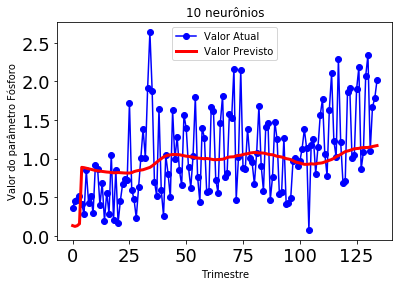

NameError: name 'predicted_valor' is not defined

In [13]:
#neuronios = [16,60,120]
resultado_mse = []
qtde_neuronios =[]

print("Rede Neural LSTM com 10 neuronios nas camadas de entrada e oculta - epocas:100")
model = Sequential() 

model.add(LSTM(units = 10, return_sequences = True, input_shape = (x_train.shape[1], 1))) 
model.add(Dropout(0.2))
model.add(LSTM(units = 10, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 10, return_sequences = False)) 
model.add(Dropout(0.2))
model.add(Dense(units = 1)) 
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

h10 = model.fit(x_train, y_train, epochs = 100, batch_size = 32, validation_data=(test_x,test_y))

y_pred = model.predict(x_test)
predicted_valor10 = sc.inverse_transform(y_pred)

plt.plot(y_test, color='blue', label='Valor Atual',marker='o')
plt.plot(predicted_valor10, color='red', linewidth = 3,label='Valor Previsto')
plt.title('10 neurônios')
plt.xlabel('Trimestre')
plt.ylabel('Valor do parâmetro Fósforo')
plt.legend()
plt.show()

mse = np.square(np.subtract(y_test,predicted_valor)).mean()
#print("MSE:", round(mse,2))
    
resultado_mse.append(mse)
qtde_neuronios.append(10)
    


In [14]:
train_score10 = model.evaluate(x_train, y_train, verbose=0)
print(train_score10)
print('Pontuação de Treino: {:.2f} MSE ({:.2f} RMSE)'.format(train_score10, math.sqrt(train_score10)))
test_score10 = model.evaluate(test_x, test_y, verbose=0)
print('Pontuação de teste: {:.2f} MSE ({:.2f} RMSE)'.format(test_score10, math.sqrt(test_score10)))

3.338845228317677e-05
Pontuação de Treino: 0.00 MSE (0.01 RMSE)
Pontuação de teste: 0.00 MSE (0.01 RMSE)


<function matplotlib.pyplot.show(*args, **kw)>

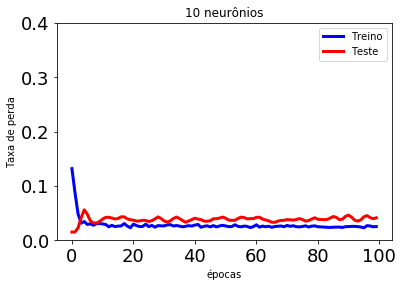

In [17]:
plt.ylim(0,0.4)
plt.plot(h10.history['loss'],'blue',linewidth = 3,label='Treino')
plt.plot(h10.history['val_loss'],'red',linewidth = 3,label='Teste')
plt.title('10 neurônios')
plt.ylabel('Taxa de perda')
plt.xlabel('épocas')
plt.legend()
plt.show

Rede Neural LSTM com 25 neuronios nas camadas de entrada e oculta - epocas:100
Train on 133 samples, validate on 135 samples
Epoch 1/100
133/133 [==============================] - 18s 137ms/sample - loss: 1.4295e-04 - val_loss: 7.2486e-05
Epoch 2/100
133/133 [==============================] - 1s 7ms/sample - loss: 5.7277e-05 - val_loss: 5.3641e-05
Epoch 3/100
133/133 [==============================] - 1s 7ms/sample - loss: 4.6596e-05 - val_loss: 5.7858e-05
Epoch 4/100
133/133 [==============================] - 1s 7ms/sample - loss: 4.9429e-05 - val_loss: 5.6755e-05
Epoch 5/100
133/133 [==============================] - 1s 7ms/sample - loss: 4.5514e-05 - val_loss: 5.0580e-05
Epoch 6/100
133/133 [==============================] - 1s 7ms/sample - loss: 4.1289e-05 - val_loss: 6.0990e-05
Epoch 7/100
133/133 [==============================] - 1s 7ms/sample - loss: 4.2424e-05 - val_loss: 5.0846e-05
Epoch 8/100
133/133 [==============================] - 1s 7ms/sample - loss: 4.2669e-05 - val_l

133/133 [==============================] - 1s 8ms/sample - loss: 3.7197e-05 - val_loss: 4.3215e-05
Epoch 74/100
133/133 [==============================] - 1s 6ms/sample - loss: 3.6030e-05 - val_loss: 4.5038e-05
Epoch 75/100
133/133 [==============================] - 1s 6ms/sample - loss: 3.4578e-05 - val_loss: 4.3282e-05
Epoch 76/100
133/133 [==============================] - 1s 6ms/sample - loss: 3.4115e-05 - val_loss: 4.3336e-05
Epoch 77/100
133/133 [==============================] - 1s 6ms/sample - loss: 3.6730e-05 - val_loss: 4.3864e-05
Epoch 78/100
133/133 [==============================] - 1s 7ms/sample - loss: 3.6844e-05 - val_loss: 4.4838e-05
Epoch 79/100
133/133 [==============================] - 1s 6ms/sample - loss: 3.3758e-05 - val_loss: 4.5251e-05
Epoch 80/100
133/133 [==============================] - 1s 6ms/sample - loss: 4.0751e-05 - val_loss: 4.4387e-05
Epoch 81/100
133/133 [==============================] - 1s 6ms/sample - loss: 4.5337e-05 - val_loss: 5.0711e-05
Epoch

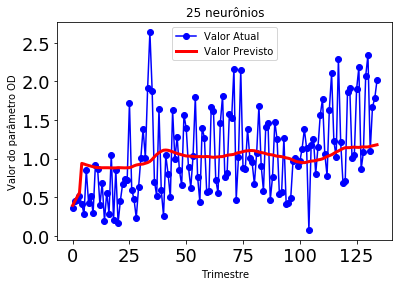

NameError: name 'predicted_valor' is not defined

In [15]:
print("Rede Neural LSTM com 25 neuronios nas camadas de entrada e oculta - epocas:100")
model = Sequential() 

model.add(LSTM(units = 25, return_sequences = True, input_shape = (x_train.shape[1], 1))) 
model.add(Dropout(0.2))
model.add(LSTM(units = 25, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 25, return_sequences = False)) 
model.add(Dropout(0.2))
model.add(Dense(units = 1)) 
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

h25 = model.fit(x_train, y_train, epochs = 100, batch_size = 32, validation_data=(test_x,test_y))

y_pred = model.predict(x_test)
predicted_valor25 = sc.inverse_transform(y_pred)

plt.plot(y_test, color='blue', label='Valor Atual',marker='o')
plt.plot(predicted_valor25, color='red',linewidth = 3, label='Valor Previsto')
plt.title('25 neurônios')
plt.xlabel('Trimestre')
plt.ylabel('Valor do parâmetro OD')
plt.legend()
plt.show()

mse = np.square(np.subtract(y_test,predicted_valor)).mean()
#print("MSE:", round(mse,2))
    
resultado_mse.append(mse)
qtde_neuronios.append(25)


In [16]:
train_score25 = model.evaluate(x_train, y_train, verbose=0)
print('Pontuação de Treino: {:.2f} MSE ({:.2f} RMSE)'.format(train_score25, math.sqrt(train_score25)))
test_score25 = model.evaluate(test_x, test_y, verbose=0)
print('Pontuação de teste: {:.2f} MSE ({:.2f} RMSE)'.format(test_score25, math.sqrt(test_score25)))

Pontuação de Treino: 0.00 MSE (0.01 RMSE)
Pontuação de teste: 0.00 MSE (0.01 RMSE)


<function matplotlib.pyplot.show(*args, **kw)>

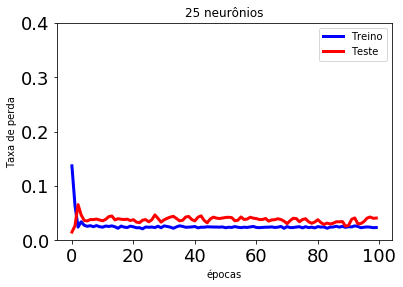

In [19]:
plt.ylim(0,0.4)
plt.plot(h25.history['loss'],'blue',linewidth = 3,label='Treino')
plt.plot(h25.history['val_loss'],'red',linewidth = 3,label='Teste')
plt.title('25 neurônios')
plt.ylabel('Taxa de perda')
plt.xlabel('épocas')
plt.legend()
plt.show

Rede Neural LSTM com 50 neuronios nas camadas de entrada e oculta - epocas:100
Train on 133 samples, validate on 135 samples
Epoch 1/100
133/133 [==============================] - 18s 137ms/sample - loss: 9.7111e-05 - val_loss: 7.8453e-05
Epoch 2/100
133/133 [==============================] - 1s 7ms/sample - loss: 5.5281e-05 - val_loss: 5.2521e-05
Epoch 3/100
133/133 [==============================] - 1s 8ms/sample - loss: 5.2631e-05 - val_loss: 5.1761e-05
Epoch 4/100
133/133 [==============================] - 1s 8ms/sample - loss: 4.5490e-05 - val_loss: 5.2140e-05
Epoch 5/100
133/133 [==============================] - 1s 7ms/sample - loss: 4.5924e-05 - val_loss: 5.0869e-05
Epoch 6/100
133/133 [==============================] - 1s 8ms/sample - loss: 4.7602e-05 - val_loss: 5.1835e-05
Epoch 7/100
133/133 [==============================] - 1s 8ms/sample - loss: 4.5349e-05 - val_loss: 5.3085e-05
Epoch 8/100
133/133 [==============================] - 1s 7ms/sample - loss: 3.7508e-05 - val_l

133/133 [==============================] - 1s 8ms/sample - loss: 3.5354e-05 - val_loss: 4.8751e-05
Epoch 74/100
133/133 [==============================] - 1s 8ms/sample - loss: 3.5910e-05 - val_loss: 4.2926e-05
Epoch 75/100
133/133 [==============================] - 1s 7ms/sample - loss: 3.6393e-05 - val_loss: 4.5081e-05
Epoch 76/100
133/133 [==============================] - 1s 7ms/sample - loss: 3.5496e-05 - val_loss: 4.3416e-05
Epoch 77/100
133/133 [==============================] - 1s 8ms/sample - loss: 3.5095e-05 - val_loss: 4.2628e-05
Epoch 78/100
133/133 [==============================] - 1s 7ms/sample - loss: 4.0078e-05 - val_loss: 4.2484e-05
Epoch 79/100
133/133 [==============================] - 1s 7ms/sample - loss: 3.4661e-05 - val_loss: 4.4589e-05
Epoch 80/100
133/133 [==============================] - 1s 7ms/sample - loss: 3.3806e-05 - val_loss: 4.2540e-05
Epoch 81/100
133/133 [==============================] - 1s 8ms/sample - loss: 3.5217e-05 - val_loss: 5.2537e-05
Epoch

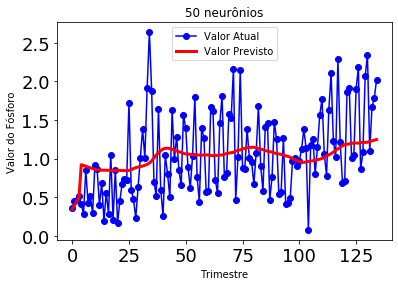

NameError: name 'sqrt' is not defined

In [17]:
print("Rede Neural LSTM com 50 neuronios nas camadas de entrada e oculta - epocas:100")
model = Sequential() 

model.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1], 1))) 
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = False)) 
model.add(Dropout(0.2))
model.add(Dense(units = 1)) 
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

h50 = model.fit(x_train, y_train, epochs = 100, batch_size = 32, validation_data=(test_x,test_y))

y_pred = model.predict(x_test)
predicted_valor50 = sc.inverse_transform(y_pred)

plt.plot(y_test, color='blue', label='Valor Atual',marker='o')
plt.plot(predicted_valor50, color='red',linewidth = 3,label='Valor Previsto')
plt.title('50 neurônios')
plt.xlabel('Trimestre')
plt.ylabel('Valor do Fósforo')
plt.legend()
plt.show()

mse = np.square(np.subtract(y_test,predicted_valor50)).mean()

rmse_treino = sqrt(mean_squared_error(y_train,x_train))
print('Treino RMSE: %.3f'%rmse_treino)
rmse_teste = sqrt(mean_squared_error(y_test,predicted_valor50))
print('Teste RMSE: %.3f'%rmse_teste)
#print("MSE:", round(mse,2))
    
resultado_mse.append(mse)
qtde_neuronios.append(50)


In [18]:
train_score50 = model.evaluate(x_train, y_train, verbose=0)
print('Pontuação de Treino: {:.2f} MSE ({:.2f} RMSE)'.format(train_score50, math.sqrt(train_score50)))
test_score50 = model.evaluate(test_x, test_y, verbose=0)
print('Pontuação de teste: {:.2f} MSE ({:.2f} RMSE)'.format(test_score50, math.sqrt(test_score50)))

Pontuação de Treino: 0.00 MSE (0.01 RMSE)
Pontuação de teste: 0.00 MSE (0.01 RMSE)


<function matplotlib.pyplot.show(*args, **kw)>

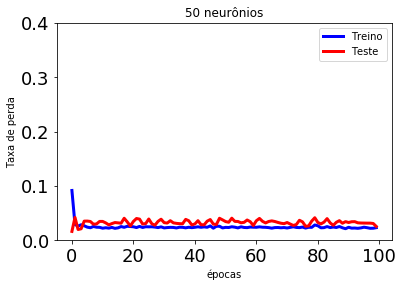

In [21]:
plt.ylim(0,0.4)
plt.plot(h50.history['loss'],'blue',linewidth = 3,label='Treino')
plt.plot(h50.history['val_loss'],'red',linewidth = 3,label='Teste')
plt.title('50 neurônios')
plt.ylabel('Taxa de perda')
plt.xlabel('épocas')
plt.legend()
plt.show

In [20]:
real_m = []
previsto_m = []
mse_m = []

for i in range(len(y_test)):
    real_m.append(round(y_test[i][0],2))
    #print("Real:",round(y_test[i][0],2))

for i in range(len(predicted_valor)):
    previsto_m.append(round(predicted_valor[i][0],2))
    #print("Previsto",round(predicted_valor[i][0],2))
    
for i in range(len(predicted_valor)):
    mse = np.square(np.subtract(y_test[i][0],predicted_valor[i][0])).mean()
    mse_m.append(mse)

Rede Neural LSTM com 40 neuronios nas camadas de entrada e oculta - epocas:100
Train on 133 samples
Epoch 1/50
133/133 [==============================] - 20s 151ms/sample - loss: 0.2149 - accuracy: 0.0000e+00
Epoch 2/50
133/133 [==============================] - 1s 8ms/sample - loss: 0.0565 - accuracy: 0.0075
Epoch 3/50
133/133 [==============================] - 1s 8ms/sample - loss: 0.0306 - accuracy: 0.0075
Epoch 4/50
133/133 [==============================] - 1s 8ms/sample - loss: 0.0366 - accuracy: 0.0000e+00
Epoch 5/50
133/133 [==============================] - 1s 8ms/sample - loss: 0.0267 - accuracy: 0.0075
Epoch 6/50
133/133 [==============================] - 1s 9ms/sample - loss: 0.0293 - accuracy: 0.0075
Epoch 7/50
133/133 [==============================] - 1s 9ms/sample - loss: 0.0307 - accuracy: 0.0075
Epoch 8/50
133/133 [==============================] - 1s 8ms/sample - loss: 0.0286 - accuracy: 0.0075
Epoch 9/50
133/133 [==============================] - 1s 9ms/sample - los

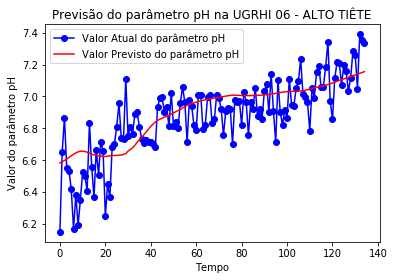

In [14]:
print("Rede Neural LSTM com 40 neuronios nas camadas de entrada e oculta - epocas:100")
model = Sequential() 

model.add(LSTM(units = 40, return_sequences = True, input_shape = (x_train.shape[1], 1))) 
model.add(Dropout(0.2))
model.add(LSTM(units = 40, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 40, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 40, return_sequences = False)) 
model.add(Dropout(0.2))
model.add(Dense(units = 1)) 
model.compile(optimizer = 'adam', loss = 'mean_squared_error',metrics=['accuracy'])

model.fit(x_train, y_train, epochs = 50, batch_size = 32)

y_pred = model.predict(x_test)
predicted_valor = sc.inverse_transform(y_pred)

plt.plot(y_test, color='blue', label='Valor Atual do parâmetro pH',marker='o')
plt.plot(predicted_valor, color='red', label='Valor Previsto do parâmetro pH')
plt.title('Previsão do parâmetro pH na UGRHI 06 - ALTO TIÊTE')
plt.xlabel('Tempo')
plt.ylabel('Valor do parâmetro pH')
plt.legend()
plt.show()

mse = np.square(np.subtract(y_test,predicted_valor)).mean()
#print("MSE:", round(mse,2))
    
resultado_mse.append(mse)
qtde_neuronios.append(40)

Rede Neural LSTM com 60 neuronios nas camadas de entrada e oculta - epocas:100
Train on 133 samples
Epoch 1/50
133/133 [==============================] - 21s 155ms/sample - loss: 0.2194 - accuracy: 0.0000e+00
Epoch 2/50
133/133 [==============================] - 1s 10ms/sample - loss: 0.0649 - accuracy: 0.0075
Epoch 3/50
133/133 [==============================] - 1s 9ms/sample - loss: 0.0493 - accuracy: 0.0075
Epoch 4/50
133/133 [==============================] - 1s 10ms/sample - loss: 0.0304 - accuracy: 0.0075
Epoch 5/50
133/133 [==============================] - 1s 9ms/sample - loss: 0.0344 - accuracy: 0.0075
Epoch 6/50
133/133 [==============================] - 1s 10ms/sample - loss: 0.0327 - accuracy: 0.0075
Epoch 7/50
133/133 [==============================] - 1s 9ms/sample - loss: 0.0326 - accuracy: 0.0075
Epoch 8/50
133/133 [==============================] - 1s 10ms/sample - loss: 0.0298 - accuracy: 0.0075
Epoch 9/50
133/133 [==============================] - 1s 10ms/sample - lo

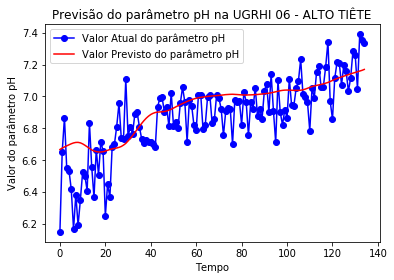

In [15]:
print("Rede Neural LSTM com 60 neuronios nas camadas de entrada e oculta - epocas:100")
model = Sequential() 

model.add(LSTM(units = 60, return_sequences = True, input_shape = (x_train.shape[1], 1))) 
model.add(Dropout(0.2))
model.add(LSTM(units = 60, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 60, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 60, return_sequences = False)) 
model.add(Dropout(0.2))
model.add(Dense(units = 1)) 
model.compile(optimizer = 'adam', loss = 'mean_squared_error',metrics=['accuracy'])

model.fit(x_train, y_train, epochs = 50, batch_size = 32)

y_pred = model.predict(x_test)
predicted_valor = sc.inverse_transform(y_pred)

plt.plot(y_test, color='blue', label='Valor Atual do parâmetro pH',marker='o')
plt.plot(predicted_valor, color='red', label='Valor Previsto do parâmetro pH')
plt.title('Previsão do parâmetro pH na UGRHI 06 - ALTO TIÊTE')
plt.xlabel('Tempo')
plt.ylabel('Valor do parâmetro pH')
plt.legend()
plt.show()

mse = np.square(np.subtract(y_test,predicted_valor)).mean()
#print("MSE:", round(mse,2))
    
resultado_mse.append(mse)
qtde_neuronios.append(60)

Rede Neural LSTM com 81 neuronios nas camadas de entrada e oculta - epocas:100
Train on 133 samples
Epoch 1/50
133/133 [==============================] - 21s 155ms/sample - loss: 0.1978 - accuracy: 0.0075
Epoch 2/50
133/133 [==============================] - 1s 10ms/sample - loss: 0.0559 - accuracy: 0.0075
Epoch 3/50
133/133 [==============================] - 1s 10ms/sample - loss: 0.0434 - accuracy: 0.0075
Epoch 4/50
133/133 [==============================] - 1s 10ms/sample - loss: 0.0355 - accuracy: 0.0075
Epoch 5/50
133/133 [==============================] - 1s 10ms/sample - loss: 0.0244 - accuracy: 0.0075
Epoch 6/50
133/133 [==============================] - 1s 11ms/sample - loss: 0.0292 - accuracy: 0.0075
Epoch 7/50
133/133 [==============================] - 1s 11ms/sample - loss: 0.0233 - accuracy: 0.0075
Epoch 8/50
133/133 [==============================] - 1s 10ms/sample - loss: 0.0275 - accuracy: 0.0075
Epoch 9/50
133/133 [==============================] - 1s 10ms/sample - los

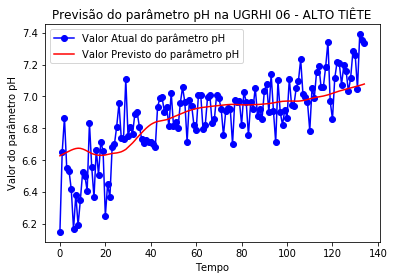

In [16]:
print("Rede Neural LSTM com 81 neuronios nas camadas de entrada e oculta - epocas:100")
model = Sequential() 

model.add(LSTM(units = 81, return_sequences = True, input_shape = (x_train.shape[1], 1))) 
model.add(Dropout(0.2))
model.add(LSTM(units = 81, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 81, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 81, return_sequences = False)) 
model.add(Dropout(0.2))
model.add(Dense(units = 1)) 
model.compile(optimizer = 'adam', loss = 'mean_squared_error',metrics=['accuracy'])

model.fit(x_train, y_train, epochs = 50, batch_size = 32)

y_pred = model.predict(x_test)
predicted_valor = sc.inverse_transform(y_pred)

plt.plot(y_test, color='blue', label='Valor Atual do parâmetro pH',marker='o')
plt.plot(predicted_valor, color='red', label='Valor Previsto do parâmetro pH')
plt.title('Previsão do parâmetro pH na UGRHI 06 - ALTO TIÊTE')
plt.xlabel('Tempo')
plt.ylabel('Valor do parâmetro pH')
plt.legend()
plt.show()

mse = np.square(np.subtract(y_test,predicted_valor)).mean()
#print("MSE:", round(mse,2))
    
resultado_mse.append(mse)
qtde_neuronios.append(81)

Rede Neural LSTM com 120 neuronios nas camadas de entrada e oculta - epocas:100
Train on 133 samples
Epoch 1/50
133/133 [==============================] - 21s 155ms/sample - loss: 0.2037 - accuracy: 0.0000e+00
Epoch 2/50
133/133 [==============================] - 2s 13ms/sample - loss: 0.0714 - accuracy: 0.0000e+00
Epoch 3/50
133/133 [==============================] - 2s 13ms/sample - loss: 0.0436 - accuracy: 0.0000e+00
Epoch 4/50
133/133 [==============================] - 2s 13ms/sample - loss: 0.0384 - accuracy: 0.0075
Epoch 5/50
133/133 [==============================] - 2s 12ms/sample - loss: 0.0317 - accuracy: 0.0075
Epoch 6/50
133/133 [==============================] - 2s 13ms/sample - loss: 0.0234 - accuracy: 0.0075
Epoch 7/50
133/133 [==============================] - 2s 12ms/sample - loss: 0.0325 - accuracy: 0.0075
Epoch 8/50
133/133 [==============================] - 2s 12ms/sample - loss: 0.0272 - accuracy: 0.0075
Epoch 9/50
133/133 [==============================] - 2s 12ms

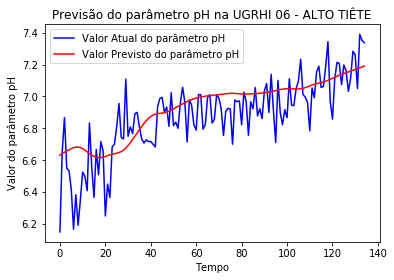

In [17]:
print("Rede Neural LSTM com 120 neuronios nas camadas de entrada e oculta - epocas:100")
model = Sequential() 

model.add(LSTM(units = 120, return_sequences = True, input_shape = (x_train.shape[1], 1))) 
model.add(Dropout(0.2))
model.add(LSTM(units = 120, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 120, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 120, return_sequences = False)) 
model.add(Dropout(0.2))
model.add(Dense(units = 1)) 
model.compile(optimizer = 'adam', loss = 'mean_squared_error',metrics=['accuracy'])

model.fit(x_train, y_train, epochs = 50, batch_size = 32)

y_pred = model.predict(x_test)
predicted_valor = sc.inverse_transform(y_pred)

plt.plot(y_test, color='blue', label='Valor Atual do parâmetro pH',marker='o')
plt.plot(predicted_valor, color='red', label='Valor Previsto do parâmetro pH')
plt.title('Previsão do parâmetro pH na UGRHI 06 - ALTO TIÊTE')
plt.xlabel('Tempo')
plt.ylabel('Valor do parâmetro pH')
plt.legend()
plt.show()

mse = np.square(np.subtract(y_test,predicted_valor)).mean()
#print("MSE:", round(mse,2))
    
resultado_mse.append(mse)
qtde_neuronios.append(120)

Rede Neural LSTM com 163 neuronios nas camadas de entrada e oculta - epocas:100
Train on 133 samples
Epoch 1/50
133/133 [==============================] - 22s 169ms/sample - loss: 0.1741 - accuracy: 0.0075
Epoch 2/50
133/133 [==============================] - 2s 16ms/sample - loss: 0.0991 - accuracy: 0.0000e+00
Epoch 3/50
133/133 [==============================] - 2s 16ms/sample - loss: 0.0381 - accuracy: 0.0075
Epoch 4/50
133/133 [==============================] - 2s 16ms/sample - loss: 0.0337 - accuracy: 0.0075
Epoch 5/50
133/133 [==============================] - 2s 17ms/sample - loss: 0.0297 - accuracy: 0.0075
Epoch 6/50
133/133 [==============================] - 2s 18ms/sample - loss: 0.0267 - accuracy: 0.0075
Epoch 7/50
133/133 [==============================] - 2s 16ms/sample - loss: 0.0283 - accuracy: 0.0075
Epoch 8/50
133/133 [==============================] - 2s 16ms/sample - loss: 0.0253 - accuracy: 0.0075
Epoch 9/50
133/133 [==============================] - 2s 16ms/sample 

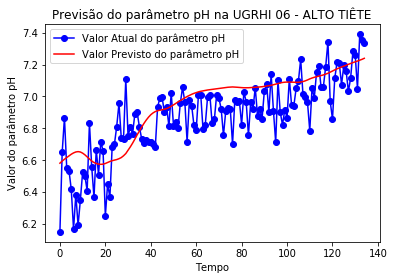

NameError: name 'resultado_mse' is not defined

In [21]:
print("Rede Neural LSTM com 163 neuronios nas camadas de entrada e oculta - epocas:100")
model = Sequential() 

model.add(LSTM(units = 163, return_sequences = True, input_shape = (x_train.shape[1], 1))) 
model.add(Dropout(0.2))
model.add(LSTM(units = 163, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 163, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 163, return_sequences = False)) 
model.add(Dropout(0.2))
model.add(Dense(units = 1)) 
model.compile(optimizer = 'adam', loss = 'mean_squared_error',metrics=['accuracy'])

model.fit(x_train, y_train, epochs = 50, batch_size = 32)

y_pred = model.predict(x_test)
predicted_valor = sc.inverse_transform(y_pred)

plt.plot(y_test, color='blue', label='Valor Atual do parâmetro pH',marker='o')
plt.plot(predicted_valor, color='red', label='Valor Previsto do parâmetro pH')
plt.title('Previsão do parâmetro pH na UGRHI 06 - ALTO TIÊTE')
plt.xlabel('Tempo')
plt.ylabel('Valor do parâmetro pH')
plt.legend()
plt.show()

mse = np.square(np.subtract(y_test,predicted_valor)).mean()
#print("MSE:", round(mse,2))
    
resultado_mse.append(mse)
qtde_neuronios.append(163)


In [22]:
real_p = []
previsto_p = []
mse_p = []

for i in range(len(y_test)):
    real_p.append(round(y_test[i][0],2))
    #print("Real:",round(y_test[i][0],2))

for i in range(len(predicted_valor)):
    previsto_p.append(round(predicted_valor[i][0],2))
    #print("Previsto",round(predicted_valor[i][0],2))
    
for i in range(len(predicted_valor)):
    mse = np.square(np.subtract(y_test[i][0],predicted_valor[i][0])).mean()
    mse_p.append(mse)

In [16]:
d = {'N_neuronios':qtde_neuronios,
     'MSE':resultado_mse}

tabela = pd.DataFrame(d)
tabela = tabela.sort_values(by=['N_neuronios'])
tabela

,N_neuronios,MSE
0,10,0.259802
1,25,0.261638
2,50,0.257290


In [19]:
plt.plot(tabela.N_neuronios.values,tabela.MSE.values, color='blue', label='Desempenho',marker='o')
plt.title('Rede LSTM: Nº Neurônios x MSE')
plt.xlabel('Nº Neurônios')
plt.ylabel('Erro Quadrático Médio- MSE')
plt.legend()
plt.show()

NameError: name 'tabela' is not defined

In [57]:
test_set.resample('3M').mean()

,cod_interaguas,valor,Altitude
data_coleta,,,
1978-01-31,121.400000,6.680000,713.000000
1978-04-30,121.400000,6.566667,713.000000
1978-07-31,121.400000,6.553333,713.000000
1978-10-31,121.400000,6.193333,713.000000
1979-01-31,122.214286,6.221429,710.357143
...,...,...,...
2018-10-31,802.461538,7.260769,724.923077
2019-01-31,868.370370,7.049259,725.962963
2019-04-30,1781.000000,7.390000,720.200000


In [24]:
    
data = {'real28':real_m,
        'previsto28':previsto_m,
        'mse28':mse_m,
        'real163':real_p,
        'mse163':mse_p,
        'previsto163':previsto_p}

tabela = pd.DataFrame(data)
tabela.head(10)

,real28,previsto28,mse28,real163,mse163,previsto163
0,6.15,6.65,0.246195,6.15,0.185976,6.58
1,6.65,6.65,0.000012,6.65,0.003076,6.59
2,6.87,6.66,0.042528,6.87,0.067948,6.61
3,6.55,6.67,0.013688,6.55,0.004411,6.62
4,6.53,6.67,0.019916,6.53,0.008843,6.63
5,6.42,6.68,0.070051,6.42,0.048699,6.64
6,6.17,6.69,0.270947,6.17,0.229419,6.65
7,6.38,6.69,0.095362,6.38,0.071937,6.65
8,6.19,6.70,0.253568,6.19,0.213523,6.65
9,6.35,6.70,0.119659,6.35,0.090832,6.65
